# TP 3.1 : Test de Student

Nous nous intéressons ici au test de Student de comparaison des moyennes sur 2 échantillons indépendants simulés selon des lois normales de même variance $\sigma^2 > 0$,
\begin{equation*}
X_1,\dots,X_p \sim \mathcal{N}(m_X,\sigma^2) \quad \text{et} \quad Y_1,\dots,Y_q \sim \mathcal{N}(m_Y,\sigma^2).
\end{equation*}
Pour expérimenter, nous prendrons $p=q=10$, $m_X=m_Y=0$ et $\sigma^2=1$.

In [3]:
# Génération des échantillons
x <- rnorm(10)
y <- rnorm(10)

Le test bilatéral de comparaison des moyennes sur ces 2 échantillons se fait en utilisant la fonction `t.test()` avec l'option `var.equal=TRUE`.

In [4]:
# Test bilatéral de comparaison des moyennes
resultat_test <- t.test(x, y, var.equal=TRUE)

# L'objet obtenu contient beaucoup d'informations
resultat_test


	Two Sample t-test

data:  x and y
t = 2.3711, df = 18, p-value = 0.0291
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1046254 1.7316284
sample estimates:
 mean of x  mean of y 
 0.1976201 -0.7205068 


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Donner l'hypothèse nulle $H_0$ et l'hypothèse alternative $H_1$ de ce test.</li>
        <li>Pourquoi faut-il supposer que les deux échantillons aient la même variance ? En particulier, quelle est la loi de la variable
            \begin{equation*}
                (p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad \text{où} \quad \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2\ ?
            \end{equation*}
        </li>
        <li>En déduire la loi de la statistique de test
            \begin{equation*}
                T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}.
            \end{equation*}
        </li>
        <li>Vérifier le calcul de la statistique de test donné dans <code>resultat_test</code>.</li>
        <li>Quelle est la p-valeur du test <code>resultat_test</code> ? Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ ? Est-ce cohérent avec notre simulation initiale ?</li>
        <li>Recalculer cette p-valeur à partir d'une loi de Student à 18 degrés de liberté.</li>
    </ol>
</div>

In [10]:
# Calcul de T
p <- 10
q <- 10

meanX <- mean(x)
meanY <- mean(y)

varX <- var(x)   # = sum((X-meanX)^2) / (p-1)
varY <- var(y)   # = sum((Y-meanY)^2) / (q-1)

# variance groupée (tilde sigma^2_{p,q})
pooled_var <- ((p-1)*varX + (q-1)*varY) / (p+q-2)

T_stat <- sqrt((p*q)/(p+q)) * (meanX - meanY) / sqrt(pooled_var)

T_stat

[1] 2.371124

Pour illustrer la notion de niveau d'un test, nous simulons 1000 paires d'échantillons de taille 10 comme ci-dessus et nous les stockons dans deux matrices `X` et `Y`.

In [ ]:
X <- matrix(rnorm(1000*10), nrow=1000)
Y <- matrix(rnorm(1000*10), nrow=1000)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer un test de comparaison des moyennes pour chaque paire d'échantillons et stocker la p-valeur du résultat dans un vecteur <code>p_valeur</code> de taille 1000.</li>
        <li>Combien de p-valeurs inférieures à 0.05 obtenez-vous ? Combien devriez-vous théoriquement en obtenir en moyenne ?</li>
        <li>Repérer l'indice du test qui donne la plus petite p-valeur (il peut être utile d'utiliser la fonction <code>which.min()</code>). Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ pour ce test ?</li>
        <li>Représenter graphiquement les données correspondant à ce test :
            <ul>
                <li>afficher la densité de la loi normale centrée réduite entre -3 et 3 avec <code>plot(dnorm, -3, 3, type="l")</code>,</li>
                <li>afficher les deux échantillons avec deux couleurs différentes grâce à la fonction <code>rug()</code>,</li>
                <li>afficher les moyennes des deux échantillons (fonction <code>rug()</code>),</li>
                <li>ajouter une légende.</li>
            </ul>
            <center><img src="img/student.png"></center>
        </li>
    </ol>
</div>

In [61]:
# À FAIRE
p_valeur <- sapply(1:nrow(X), function(i) {
  t.test(X[i, ], Y[i, ], var.equal = TRUE)$p.value
})

In [62]:
count <- sum(p_valeur < 0.05)

count

[1] 32

In [63]:
idx_min <- which.min(p_valeur)
idx_min
p_valeur[idx_min]

# Niveau 95% : alpha = 0.05
if (p_valeur[idx_min] < 0.05) {
  cat("Rejeter H0 pour ce test.\n")
} else {
  cat("Ne pas rejeter H0 pour ce test.\n")
}

[1] 248

[1] 0.002804513

Rejeter H0 pour ce test.


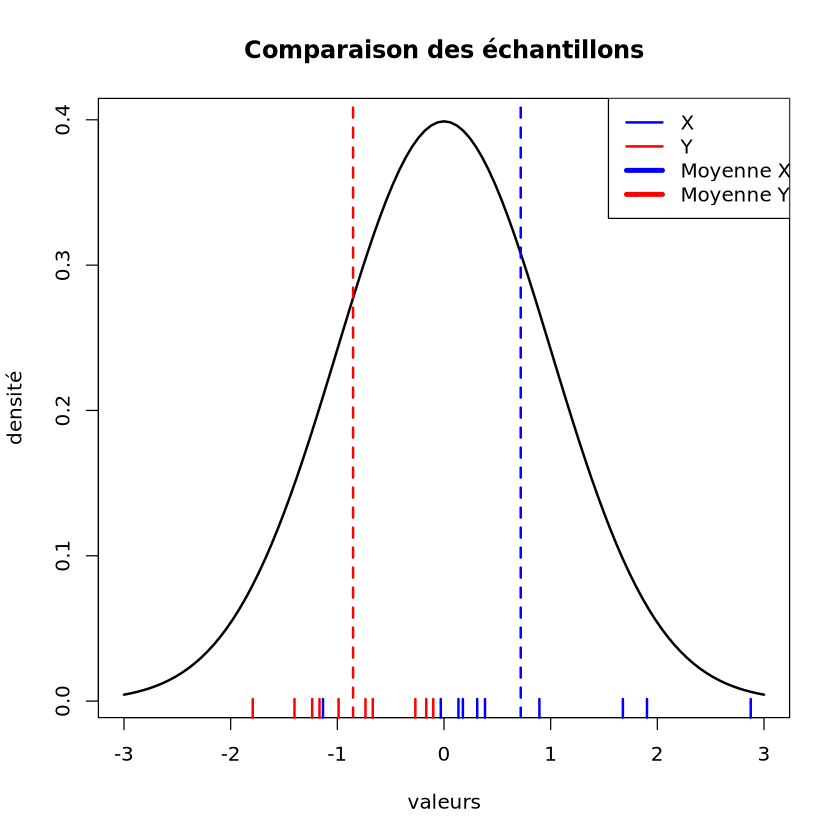

In [ ]:
par(bg = 'white')

x_sample <- X[idx_min, ]
y_sample <- Y[idx_min, ]

# Tracer densité normale centrée réduite
plot(dnorm, -3, 3, type = "l", lwd = 2, col = "black", main = "Comparaison des échantillons",
     ylab = "densité", xlab = "valeurs")

# Ajouter les échantillons avec rug
rug(x_sample, col = "blue", lwd = 2)
rug(y_sample, col = "red", lwd = 2)

# Ligne verticale pointillée pour les moyennes
abline(v = mean(x_sample), col = "blue", lty = 2, lwd = 2)
abline(v = mean(y_sample), col = "red",  lty = 2, lwd = 2)

# Ajouter une légende
legend("topright", legend = c("X", "Y", "Moyenne X", "Moyenne Y"),
       col = c("blue", "red", "blue", "red"), lwd = c(2, 2, 4, 4))